### LeNet
- Yann LeCun 1980년대 후반 ~ 1990년대 초반에 개발한 초기의 딥러닝 모델 중 하나
- 손글씨 숫자 인식 작업에 활용되었음

In [1]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

Epoch 1/10


c:\ProgramData\anaconda3\envs\SWAI\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8967 - loss: 0.3537 - val_accuracy: 0.9625 - val_loss: 0.1332
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9590 - loss: 0.1378 - val_accuracy: 0.9735 - val_loss: 0.0919
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9730 - loss: 0.0904 - val_accuracy: 0.9817 - val_loss: 0.0700
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9791 - loss: 0.0681 - val_accuracy: 0.9778 - val_loss: 0.0725
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9836 - loss: 0.0524 - val_accuracy: 0.9852 - val_loss: 0.0570
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9867 - loss: 0.0417 - val_accuracy: 0.9823 - val_loss: 0.0634
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9894 - loss: 0.0339 - val_accuracy: 0.9862 - val_loss: 0.0513
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9912 - loss: 0.0284 - val_accuracy: 0.9850 - val_

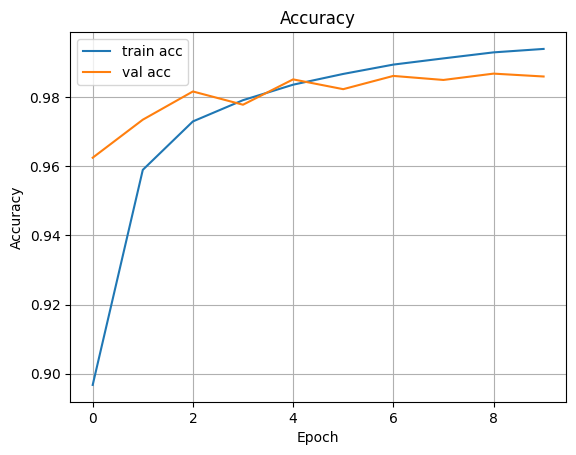

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. 데이터 로딩 및 전처리 (MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 2. LeNet-5 모델 구성
def build_lenet():
    model = models.Sequential([
        # 첫 번째 Convolutional Layer
        layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), padding='same'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=2),

        # 두 번째 Convolutional Layer
        layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=2),

        # Flatten
        layers.Flatten(),

        # 첫 번째 Fully Connected Layer
        layers.Dense(120, activation='tanh'),

        # 두 번째 Fully Connected Layer
        layers.Dense(84, activation='tanh'),

        # 출력층
        layers.Dense(10, activation='softmax')
    ])
    return model

# 3. 모델 생성 및 컴파일
model = build_lenet()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 학습
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# 5. 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc:.4f}")

# 6. 시각화
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
